# 2. End-to-End Machine Learning Project

## Frame a Problem

Data Selected:\
California census data\

Problem:\
Your Model should learn from this data and be able to predict the median housing price in any district, given all other metrics.

**Define the Problem, type of learning, data processing, type of algorithm**
* We have labels provided as the house price so Supervise learning
* As we need to predict it so Regression task and more specific muliple regression problem as multiple features are available
* Univariate as we need only predict single label
* finally no continuos flow of data so, batch learning will be best

**Select a Performance Measure**
* Root Mean Square Error (RMSE)
* Mean Absolute Error (MAE)

**Check the Assumptions**


## Get the Data

In [1]:
# import the necessary libraries
import pandas as pd
import requests
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
response = requests.get(url)

if response.status_code==200:
  df_housing = pd.read_csv(url, delimiter=',', encoding='utf-8')
  print(df_housing.head())
else:
  print('Error Loading file')

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df_housing.shape

(20640, 10)

In [7]:
df_housing['ocean_proximity'].unique(),df_housing['ocean_proximity'].value_counts()

(array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
       dtype=object),
 <1H OCEAN     9136
 INLAND        6551
 NEAR OCEAN    2658
 NEAR BAY      2290
 ISLAND           5
 Name: ocean_proximity, dtype: int64)

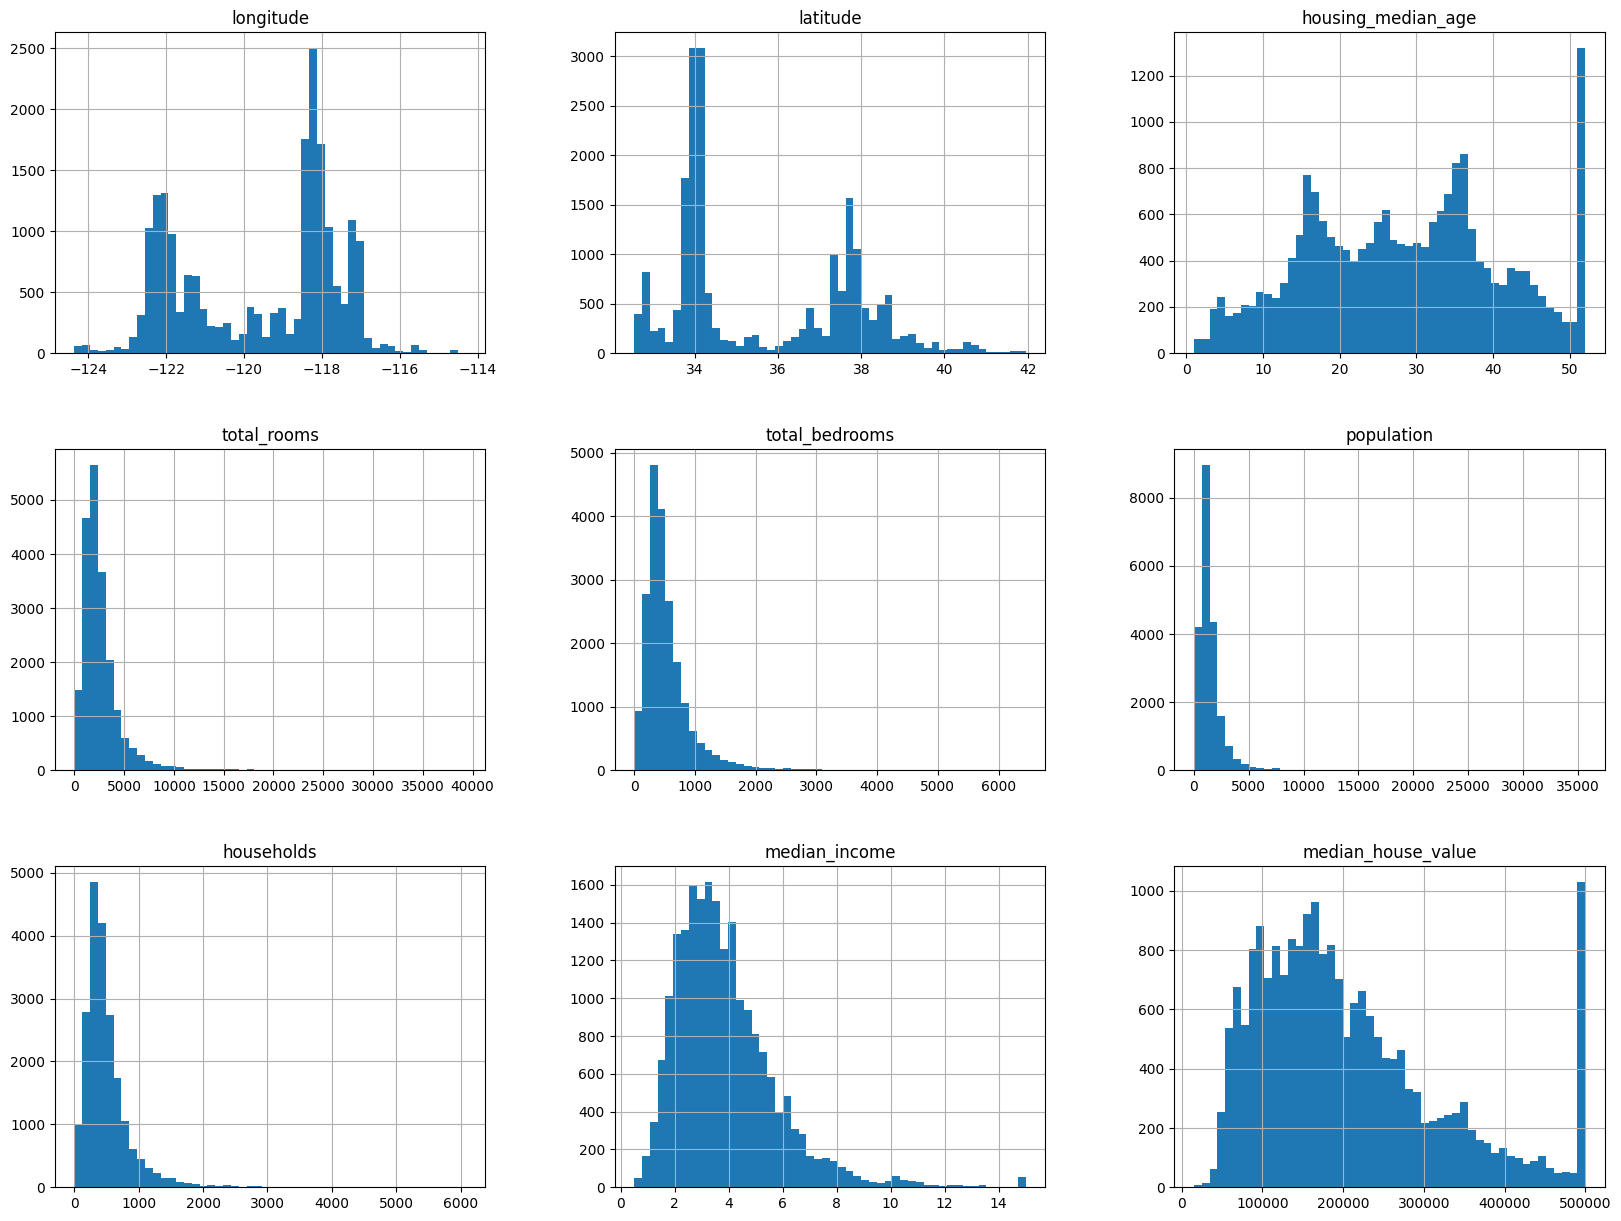

In [8]:
import matplotlib.pyplot as plt
df_housing.hist(bins=50,figsize=(20,15))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_housing = df_housing.drop(columns=['median_income'])
y_housing = df_housing[['median_income']]

X_housing.head(),y_housing.head()

(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_house_value ocean_proximity  
 0       322.0       126.0            452600.0        NEAR BAY  
 1      2401.0      1138.0            358500.0        NEAR BAY  
 2       496.0       177.0            352100.0        NEAR BAY  
 3       558.0       219.0            341300.0        NEAR BAY  
 4       565.0       259.0            342200.0        NEAR BAY  ,
    median_income
 0         8.3252
 1         8.3014
 2         7.2574
 3         5.6431
 4         3.8462)

In [10]:
df_housing.reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
# this is random sampling method
X_train,X_test,y_train,y_test = train_test_split(X_housing,
                                                            y_housing,
                                                            test_size=0.2,
                                                            train_size=0.8,
                                                            random_state=42)

In [12]:
len(X_train),len(X_test)

(16512, 4128)

In [13]:
# Stratified Sampling when we require a balance datasets
# after discussion you got to know that median income is very important attribute to predict the median housing price
df = df_housing.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
import numpy as np

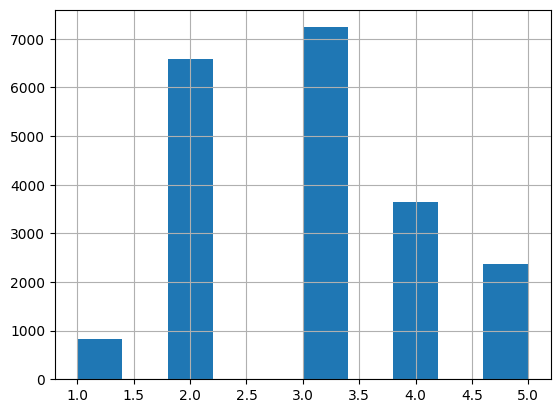

In [15]:
df['income_cat'] = pd.cut(df['median_income'],
                          bins=[0.,1.5,3.0,4.5,6.,np.inf],
                          labels=[1,2,3,4,5])
df['income_cat'].hist()
plt.show()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
# need to create the instance for Stratified Shufflesplit
a= StratifiedShuffleSplit(n_splits=1,
                          test_size=0.2,
                          random_state=42)

for str_train_set_index,str_test_set_index in a.split(df,df['income_cat']):
  #split generates index to split data training and test set.
  set_train_set = df.loc[str_train_set_index]
  set_test_set = df.loc[str_test_set_index]

In [18]:
# lets check the proportion of the data
(set_test_set['income_cat'].value_counts())/len(set_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
set_test_set.drop('income_cat',axis=1,inplace=True)
set_train_set.drop('income_cat',axis=1,inplace=True)
set_test_set.columns,set_train_set.columns

(Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='object'))

Text(0.5, 1.0, 'A Geographical scatterplot of the data')

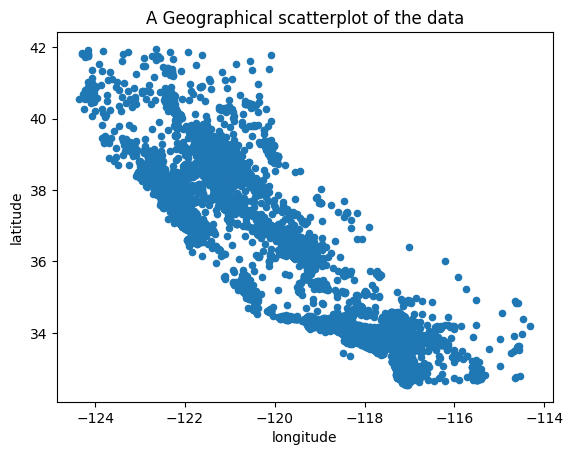

In [20]:
housing = set_train_set.copy()
housing.plot(kind='scatter',x='longitude',y='latitude')
plt.title('A Geographical scatterplot of the data')

<Axes: xlabel='longitude', ylabel='latitude'>

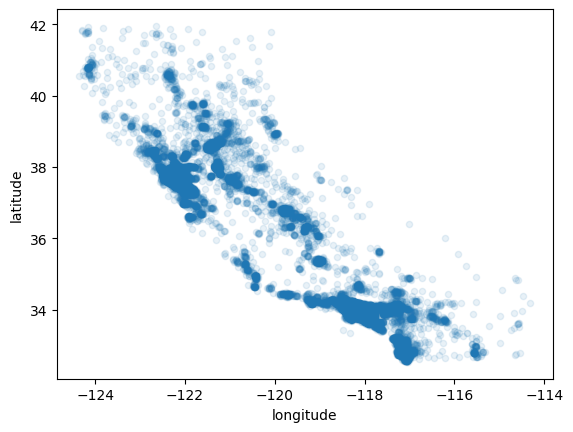

In [21]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

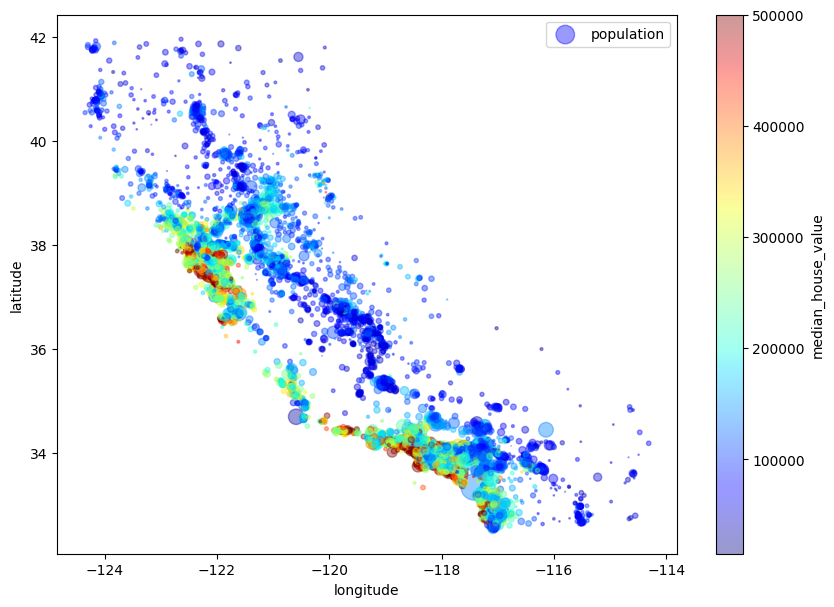

In [22]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100,label='population',figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [23]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-23-38ae4c0838cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

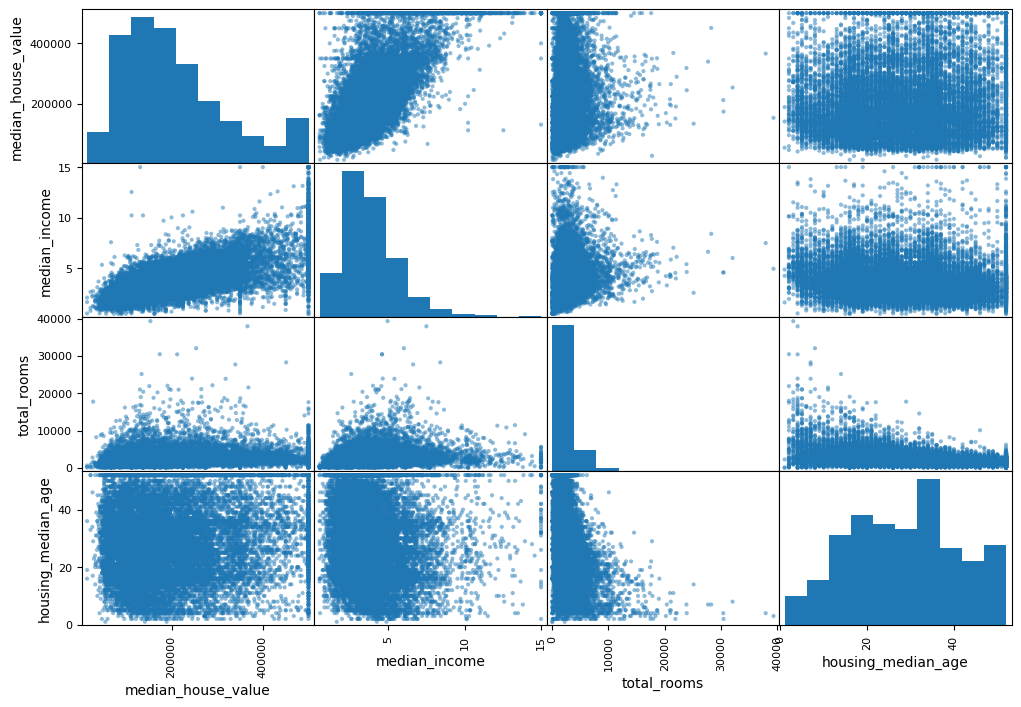

In [24]:
#another way to find the correlation is using pandas scatter_matrix function
from pandas.plotting import scatter_matrix

attributes=['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing[attributes],figsize=(12,8))

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

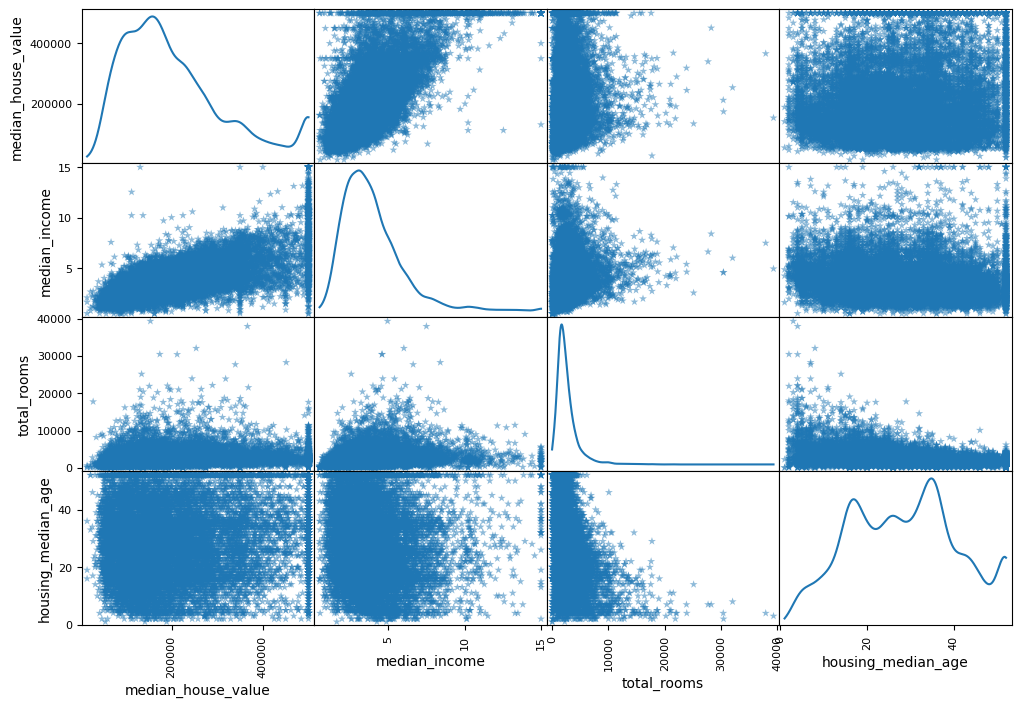

In [25]:
scatter_matrix(housing[attributes],figsize=(12,8),marker='*',diagonal='kde')

<Axes: xlabel='median_income', ylabel='median_house_value'>

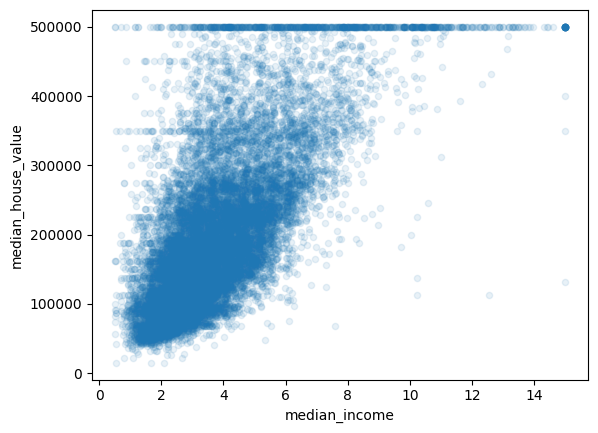

In [26]:
housing.plot(kind='scatter',x='median_income',y='median_house_value', alpha=0.1)

In [27]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [28]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-28-908495a6ce7e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare the Data for machine learning algorithms

In [136]:
#first revert back to clean training set
housing = set_train_set.drop('median_house_value',axis=1)
housing_labels=set_train_set['median_house_value'].copy()

### Data Cleaning
Most machine learning algorithms cannont work with missing features.
* Get rid of the corresponding districts
* Get rid of the whole attribute.
* Set the value to some value (zero, the mean, the median, etc.)

In [73]:
median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)

In [74]:
from sklearn.impute import SimpleImputer

In [75]:
imputer = SimpleImputer(strategy='median')

In [76]:
#Since the median can only be computed on numerical attributes, we need to create a copy fo the data without text attribute
housing_num = housing.drop('ocean_proximity',axis=1)

imputer.fit(housing_num)

imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [77]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [78]:
# now you can apply your trained dataset to transform the training set by replacing missing values by the learned medians:
X = imputer.transform(housing_num)
print(type(X))

<class 'numpy.ndarray'>


In [79]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [80]:
print(type(housing_tr))

<class 'pandas.core.frame.DataFrame'>


## Handling Text and Categorical Attributes

In [81]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder  = OrdinalEncoder()

#Housing categorical data
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [82]:
housing_cat_encoded =ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [83]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

 So the problem with  above encoding is that it will give different numerical numbers to different categories
 this will create a bias based on the number assigne to it for example male is 1 and female is 0 then male will get more preference
 To solve this we use one hot encoding technique.

In [84]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot # this gives out sparse matrix

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [85]:
# to store the memory mostly zero and instead we can store the location of the non zero elemnts
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [86]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [87]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Tranformers

In [99]:
#creating a custom transformer that will add the columns that we created

from sklearn.base import BaseEstimator,TransformerMixin

# column indexes to transform
rooms_ix,bedrooms_ix,population_ix,household_ix = 3,4,5,6

# create a class with the transformation defined
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room=True): # by default it is true
    self.add_bedrooms_per_room=add_bedrooms_per_room

  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
    population_per_household = X[:,population_ix]/X[:,household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]



In [107]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [108]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [109]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [110]:
type(housing_extra_attribs)

numpy.ndarray

In [111]:
testdf = pd.DataFrame(housing_extra_attribs,columns=['longitude', 'latitude',
                                                   'housing_median_age', 'total_rooms',
                                                   'total_bedrooms', 'population', 'households',
                                                   'median_income','ocean_proximity',
                                                   'rooms_per_household','population_per_household'])
testdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## **Feature Scaling**

**Min-Max Scaling** - Values are shifted and rescaled so that they end up ranging from 0 to 1.Scitkit-Learn provides a transformer called **MinMaxScaler** for this.

**Normalization** - Does not bound values to a specific range. But less affected by outliers.Scikit-Learn provides a transformer called **StandardScaler** for standardization.

## **Transformation Pipelines**
As you can see, there are many data transformations steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of tranformations.

In [123]:
# creating a small pipeline for the numerical attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [124]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [129]:
from sklearn.compose import ColumnTransformer

num_attrbs = list(housing_num)
cat_attribs=list(housing.select_dtypes(include=['object']).columns)

full_pipline = ColumnTransformer([
    ('num',num_pipeline,num_attrbs),
    ('cat',OneHotEncoder(),cat_attribs),
])
housing_prepared = full_pipline.fit_transform(housing)

In [130]:
type(housing_prepared)

numpy.ndarray

In [137]:
housing_prepared = full_pipline.fit_transform(housing)

In [131]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

## **Select and Train a Model**

In [133]:
housing_labels.head()

5241     500001.0
17352    162500.0
3505     204600.0
7777     159700.0
14155    184000.0
Name: median_house_value, dtype: float64

In [140]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,
            housing_labels)

some_data = housing.iloc[:5]
some_labels= housing_labels.iloc[:5]

some_data_prepared  = full_pipline.transform(some_data)
print('Predictions:',lin_reg.predict(some_data_prepared))
print('Labels:',list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [144]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [145]:
## Decision Tree regressor capable of finding complex nonlinear relationships in the data
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared,
              housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions,
                              housing_labels)
tree_rmse = np.sqrt(tree_mse)

tree_rmse


0.0

In [148]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
  print("Scores:",scores)
  print('Mean:',scores.mean())
  print('standard deviation:',scores.std())
display_scores(tree_rmse_scores)

Scores: [72478.17248555 71049.55934226 68851.59701263 72225.39442804
 71115.48765245 77433.83567605 71237.16255959 73168.0060556
 68588.19392322 71582.7948879 ]
Mean: 71773.02040232651
standard deviation: 2337.7255009128744


In [149]:
lin_scores = cross_val_score(lin_reg,
                             housing_prepared,
                             housing_labels,
                             scoring='neg_mean_squared_error',
                             cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
standard deviation: 2880.3282098180634


In [151]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared,housing_labels)
forest_reg_predict = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(forest_reg_predict,
                                housing_labels)


In [152]:
forest_rmse = np.sqrt(forest_mse)

forest_rmse

18718.529876652035

In [156]:
forest_reg_mse = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_reg_rmse = np.sqrt(-forest_reg_mse)

display_scores(forest_reg_rmse)

KeyboardInterrupt: 

In [157]:
print('hello')

hello


## **Fine Tune your Model**